# QISKit example: Ripple adder
Based on Vedral, Barenco, and Ekert (1996).

* Gines Carrascal, Complutense University of Madrid

https://github.com/gines-carrascal/jupyter-qiskit

In [1]:
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit import Aer

import qiskit.tools.jupyter

In [2]:
sumando_1 = input("Primer sumando en binario (4 bits)")
sumando_2 = input("Segundo sumando en binario(4 bits)")

Primer sumando en binario (4 bits)0001
Segundo sumando en binario(4 bits)0001


In [3]:
n = 4

a = QuantumRegister(n,"a")
b = QuantumRegister(n+1, "b")
c = QuantumRegister(n, "c")
resultado = ClassicalRegister(n+1, "result")

qc = QuantumCircuit(a,b,c,resultado)

for i in range(n):
    if sumando_1[i] == "1":
        qc.x(a[n - (i+1)])
for i in range(n):
    if sumando_2[i] == "1":
        qc.x(b[n - (i+1)])

for i in range(n-1):
    qc.ccx(a[i], b[i], c[i+1])
    qc.cx(a[i], b[i])
    qc.ccx(c[i], b[i], c[i+1])

qc.ccx(a[n-1], b[n-1], b[n])
qc.cx(a[n-1], b[n-1])
qc.ccx(c[n-1], b[n-1], b[n])  

qc.cx(c[n-1], b[n-1])

for i in range(n-1):
    qc.ccx(c[(n-2)-i], b[(n-2)-i], c[(n-1)-i])
    qc.cx(a[(n-2)-i], b[(n-2)-i])
    qc.ccx(a[(n-2)-i], b[(n-2)-i], c[(n-1)-i])
    
    qc.cx(c[(n-2)-i], b[(n-2)-i])
    qc.cx(a[(n-2)-i], b[(n-2)-i])

qc.measure(b,resultado)    

In [4]:
%circuit_library_info qc

In [7]:
from qiskit import IBMQ, transpile
pro = IBMQ.load_account()
backend = pro.get_backend("ibmq_16_melbourne")

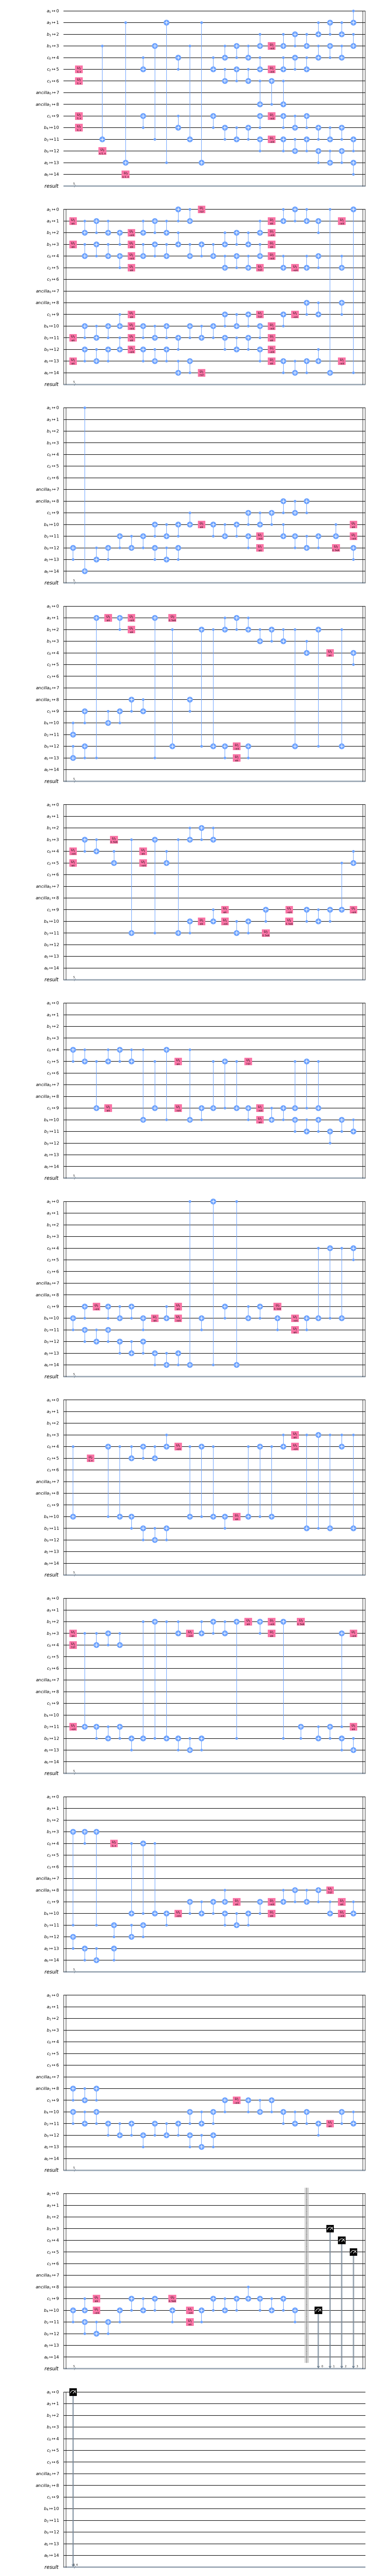

In [8]:
sc_circ = transpile(qc,backend)
sc_circ.draw(output='mpl')

In [9]:
%circuit_library_info sc_circ

Adding barriers for easiest understanding:

In [10]:
n = 4

a = QuantumRegister(n,"a")
b = QuantumRegister(n+1, "b")
c = QuantumRegister(n, "c")
resultado = ClassicalRegister(n+1, "result")

qc = QuantumCircuit(a,b,c,resultado)

for i in range(n):
    if sumando_1[i] == "1":
        qc.x(a[n - (i+1)])
for i in range(n):
    if sumando_2[i] == "1":
        qc.x(b[n - (i+1)])
qc.barrier(a,b,c)

for i in range(n-1):
    qc.ccx(a[i], b[i], c[i+1])
    qc.cx(a[i], b[i])
    qc.ccx(c[i], b[i], c[i+1])
    qc.barrier(a,b,c)

qc.ccx(a[n-1], b[n-1], b[n])
qc.cx(a[n-1], b[n-1])
qc.ccx(c[n-1], b[n-1], b[n])  
qc.barrier(a,b,c)

qc.cx(c[n-1], b[n-1])
qc.barrier(a,b,c)

for i in range(n-1):
    qc.ccx(c[(n-2)-i], b[(n-2)-i], c[(n-1)-i])
    qc.cx(a[(n-2)-i], b[(n-2)-i])
    qc.ccx(a[(n-2)-i], b[(n-2)-i], c[(n-1)-i])
    
    qc.cx(c[(n-2)-i], b[(n-2)-i])
    qc.cx(a[(n-2)-i], b[(n-2)-i])
    qc.barrier(a,b,c)


qc.measure(b,resultado)    

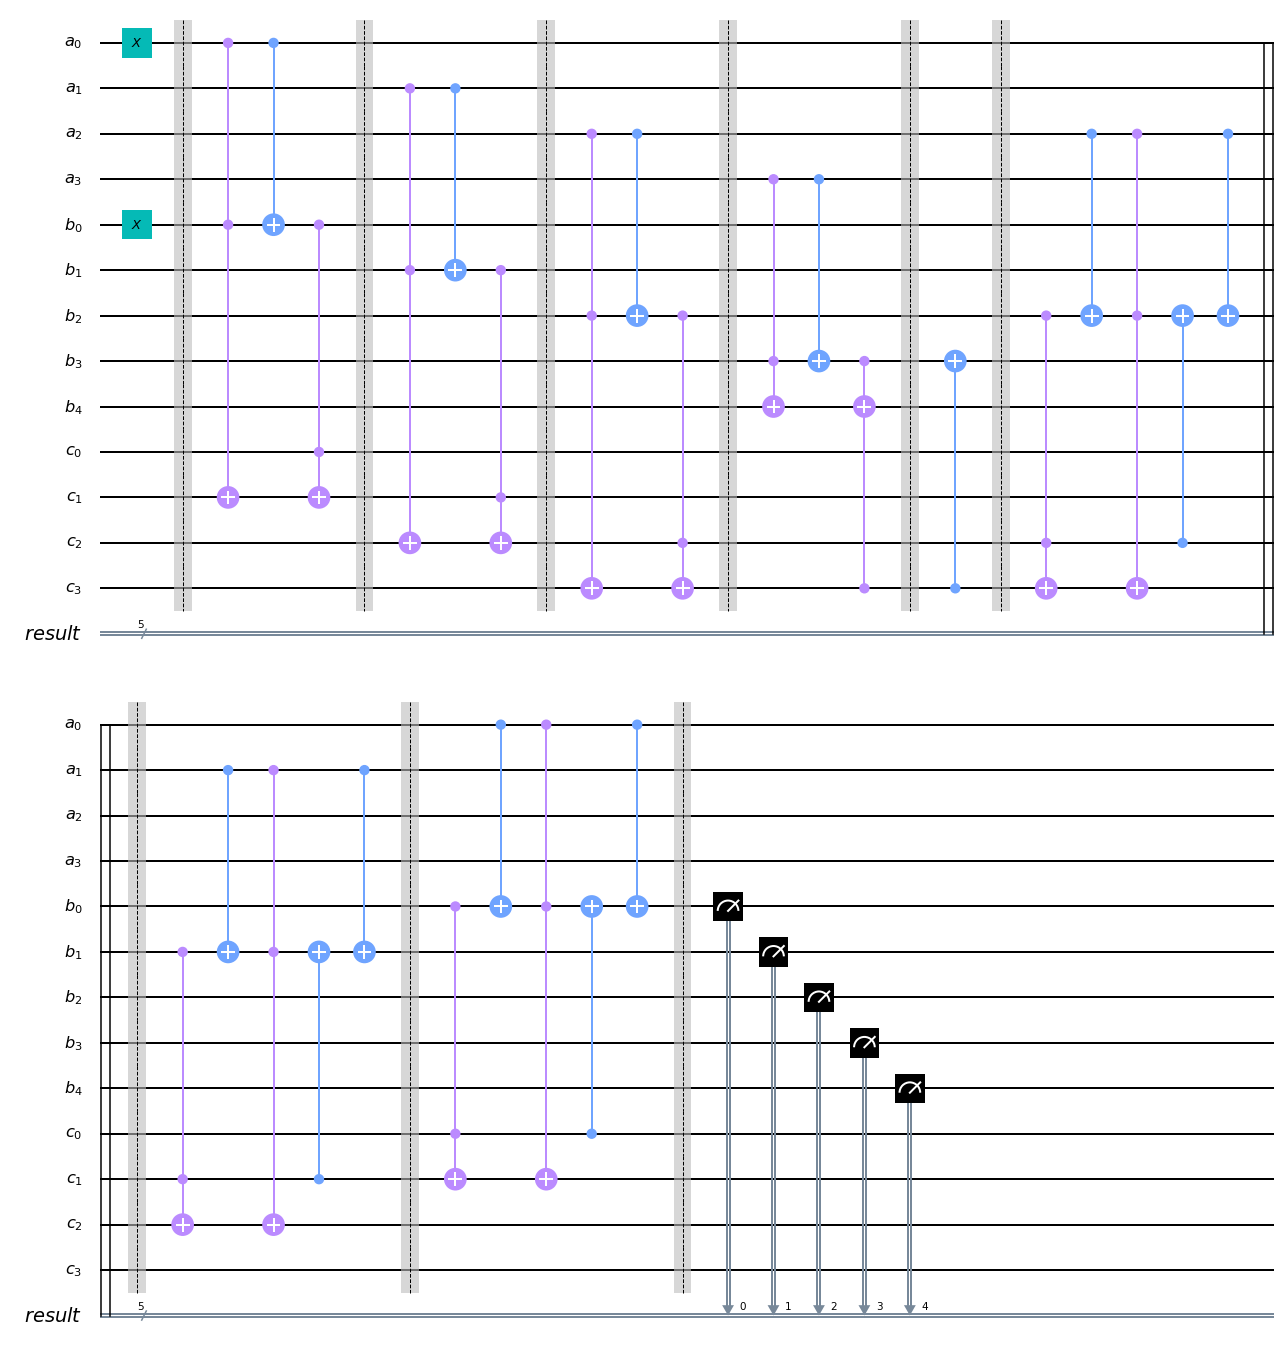

In [11]:
qc.draw(output='mpl')

In [12]:
my_backend = Aer.get_backend("qasm_simulator")  
job = execute(qc, my_backend, shots=20)
job_stats = job.result().get_counts()
print(job_stats) 

{'00010': 20}


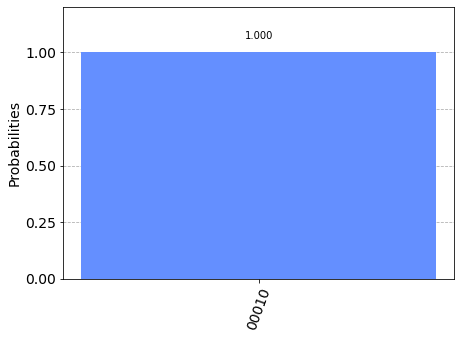

In [13]:
from qiskit.visualization import plot_histogram


# Run in interactive mode
plot_histogram(job_stats)

### Statevector representations
on the smallest circuit for simplicity

In [14]:
n = 1
sumando_1="1"
sumando_2="1"

a = QuantumRegister(n,"a")
b = QuantumRegister(n+1, "b")
c = QuantumRegister(n, "c")


qc = QuantumCircuit(a,b,c)

for i in range(n):
    if sumando_1[i] == "1":
        qc.x(a[n - (i+1)])
for i in range(n):
    if sumando_2[i] == "1":
        qc.x(b[n - (i+1)])
        
for i in range(n-1):
    qc.ccx(a[i], b[i], c[i+1])
    qc.cx(a[i], b[i])
    qc.ccx(c[i], b[i], c[i+1])

qc.ccx(a[n-1], b[n-1], b[n])
qc.cx(a[n-1], b[n-1])
qc.ccx(c[n-1], b[n-1], b[n])  

qc.cx(c[n-1], b[n-1])

for i in range(n-1):
    qc.ccx(c[(n-2)-i], b[(n-2)-i], c[(n-1)-i])
    qc.cx(a[(n-2)-i], b[(n-2)-i])
    qc.ccx(a[(n-2)-i], b[(n-2)-i], c[(n-1)-i])
    
    qc.cx(c[(n-2)-i], b[(n-2)-i])
    qc.cx(a[(n-2)-i], b[(n-2)-i])

 

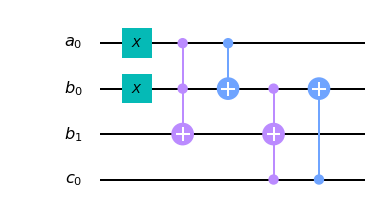

In [15]:
qc.draw(output='mpl')

In [16]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, iplot_state_hinton
from qiskit.visualization import plot_state_qsphere
backend = Aer.get_backend('statevector_simulator') # the device to run on
result = execute(qc, backend).result()
psi  = result.get_statevector(qc)

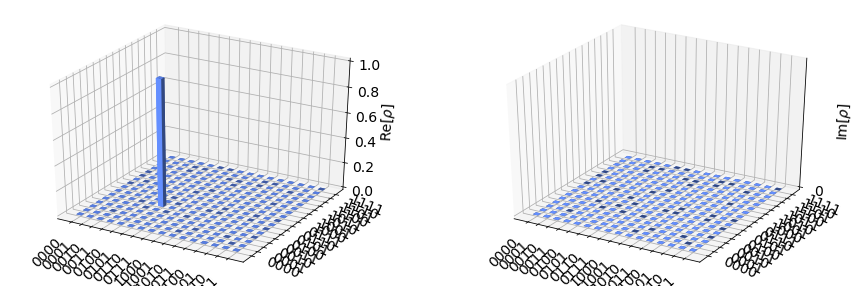

In [17]:
plot_state_city(psi)

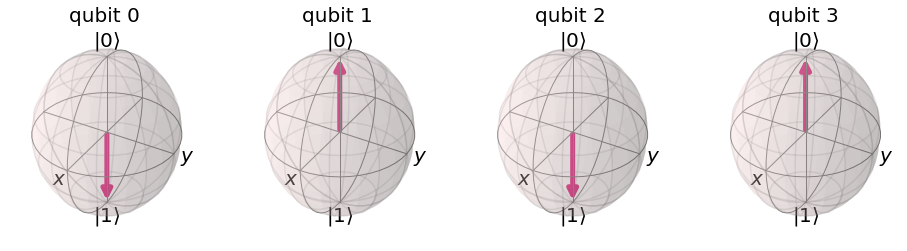

In [18]:
plot_bloch_multivector(psi)

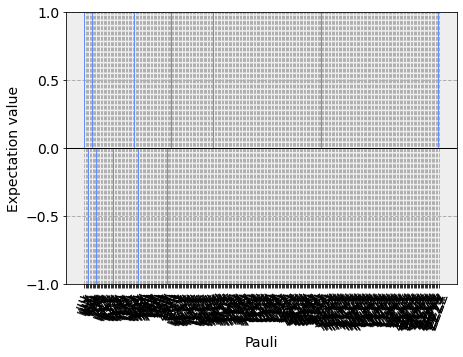

In [19]:
plot_state_paulivec(psi)

In [20]:
iplot_state_hinton(psi)

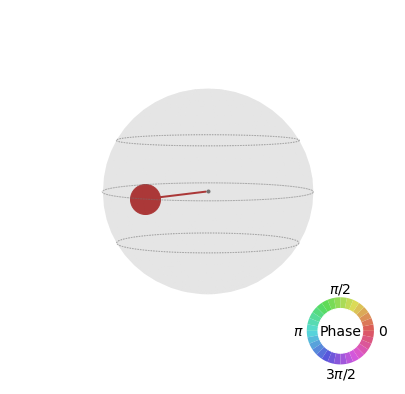

In [21]:
plot_state_qsphere(psi)

In [22]:
%qiskit_version_table